In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('./datasets/wdbc.csv')
X = df.iloc[:, 2:].values
y = df.iloc[:, 1]
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

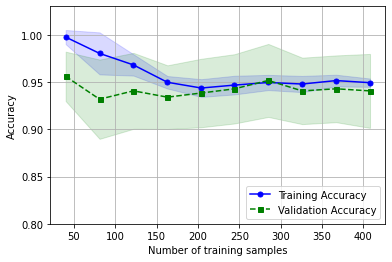

In [8]:
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe_lr = make_pipeline (
    StandardScaler(),
    PCA(n_components=3),
    LogisticRegression (
        penalty='l2',
        solver='lbfgs'
    )
)

train_sizes, train_scores, test_scores = learning_curve (
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot (
    train_sizes, 
    train_mean, 
    color='blue', 
    marker='o', 
    markersize=5, 
    label='Training Accuracy'
)

plt.fill_between (
    train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=.15, color='blue'
)

plt.plot (
    train_sizes,
    test_mean,
    color='green',
    marker='s',
    linestyle='--',
    markersize=5,
    label='Validation Accuracy'
)

plt.fill_between (
    train_sizes,
    test_mean + test_std,
    test_mean - test_std,
    alpha=.15, color='green'
)

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()